In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_features = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_features.csv",header=None)
train_labels = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_labels.csv",header=None)
train_skelleton_points = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_skelletonpoints.csv",header=None)

In [ ]:
def SkelletonPoints(sk):
  x = []
  y = []
  for i in range(sk.shape[1]-18):
    x.append(sk[0][i])
    y.append(sk[0][i+18])
  return x,y

values_skelleton = train_skelleton_points.iloc[:,:36]
random_sp = values_skelleton.sample(n=1)

x,y = SkelletonPoints(random_sp.values)

In [ ]:
index = (random_sp.index[0])

In [ ]:
connections_18 = [
    1,2,
    2,3,
    3,4,
    4,5,
    2,6,
    6,7,
    7,8,
    2,9,
    9,10,
    10,11,
    2,12,
    12,13,
    13,14,
    1,15,
    1,16,
    15,17,
    16,18,
    3,6,
    9,12
]

connections = []
for i in range(19):
  connections.append([connections_18[2*i]-1,connections_18[2*i+1]-1])

In [ ]:
connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 8],
 [8, 9],
 [9, 10],
 [1, 11],
 [11, 12],
 [12, 13],
 [0, 14],
 [0, 15],
 [14, 16],
 [15, 17],
 [2, 5],
 [8, 11]]

In [ ]:
points = np.stack((x,y))
coordinates  = []
for i in range(18):
  coordinates.append([points[0][i],points[1][i]])
coordinates

[[np.float64(294.4), np.float64(205.69)],
 [np.float64(337.4), np.float64(263.02)],
 [np.float64(333.81), np.float64(298.84)],
 [np.float64(430.55), np.float64(288.1)],
 [np.float64(473.54), np.float64(227.19)],
 [np.float64(340.98), np.float64(227.19)],
 [np.float64(416.22), np.float64(220.03)],
 [np.float64(469.96), np.float64(202.11)],
 [np.float64(441.29), np.float64(359.75)],
 [np.float64(498.62), np.float64(241.52)],
 [np.float64(591.77), np.float64(266.6)],
 [np.float64(448.46), np.float64(298.84)],
 [np.float64(502.2), np.float64(212.86)],
 [np.float64(584.6), np.float64(252.27)],
 [np.float64(280.07), np.float64(212.86)],
 [np.float64(287.24), np.float64(202.11)],
 [np.float64(283.66), np.float64(255.85)],
 [np.float64(581.02), np.float64(263.02)]]

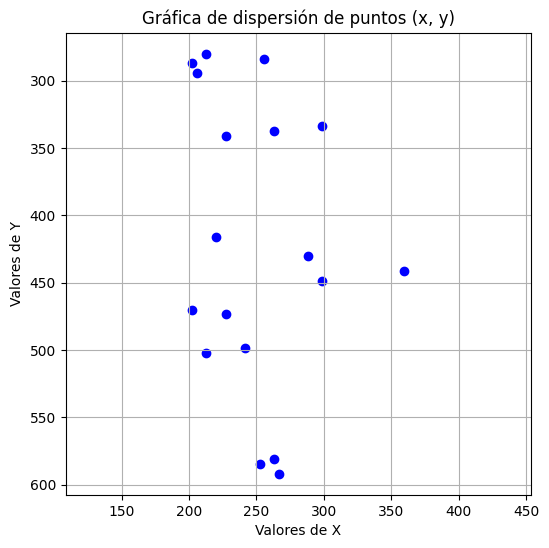

In [ ]:
# Crear la gráfica de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y, x, color='b', marker='o')

plt.gca().invert_yaxis()

# Etiquetas y título
plt.title("Gráfica de dispersión de puntos (x, y)")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.axis('equal')

# Mostrar la gráfica
plt.grid(True)
plt.show()

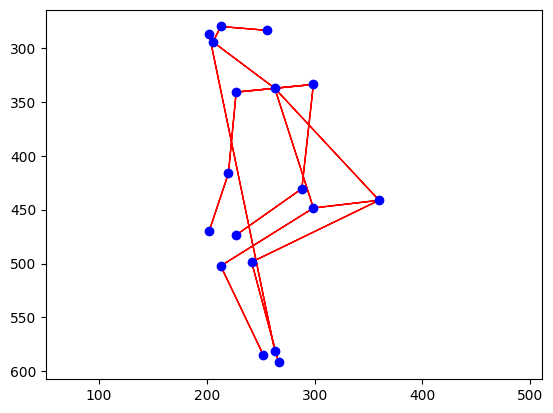

In [ ]:
# Mostrar puntos y coordenadas
for i, (x_p, y_p) in enumerate(coordinates):
    plt.plot(y_p, x_p, 'o', color='blue')

plt.gca().invert_yaxis()
plt.axis('equal')


# Dibujar flechas según conexiones
for a, b in connections:
    x1, y1 = coordinates[a]
    x2, y2 = coordinates[b]
    dx, dy = x2 - x1, y2 - y1
    plt.arrow(y1, x1, dy, dx, head_width=0.1, length_includes_head=True, color='red')

#plt.title("Pose: ", random_sp.index[0])